<a href="https://colab.research.google.com/github/prateekrao/Breast-Cancer-Detection/blob/main/current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/split-data.zip"

In [32]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt


In [4]:
gen = ImageDataGenerator(
    rescale = 1/255
)

In [7]:
train_set = gen.flow_from_directory(
    directory = "/content/split-data/train",
    class_mode = 'categorical',
    color_mode = 'rgb',
    target_size = (128,128),
    shuffle = True,
)

Found 194266 images belonging to 2 classes.


In [8]:
test_set = gen.flow_from_directory(
    directory = "/content/split-data/test",
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = False
)

Found 41629 images belonging to 2 classes.


In [9]:
validation_set = gen.flow_from_directory(
    directory = '/content/split-data/valid',
    target_size = (128,128),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = False
)

Found 41629 images belonging to 2 classes.


In [25]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3,3),  activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (5,5),  activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu', kernel_regularizer=l1(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu', kernel_regularizer=l2(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(0.0001)))
model.add(Dense(2, activation='softmax'))

In [28]:
opt = Adam(lr = 1e-05)

model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(train_set, validation_data=validation_set, batch_size = 128, epochs = 10, shuffle = True)

Epoch 1/10
6071/6071 [==============================] - 261s 43ms/step - loss: 3.5495 - accuracy: 0.8059 - val_loss: 0.6760 - val_accuracy: 0.8296
Epoch 2/10
6071/6071 [==============================] - 259s 43ms/step - loss: 0.5959 - accuracy: 0.8310 - val_loss: 0.4799 - val_accuracy: 0.8337
Epoch 3/10
6071/6071 [==============================] - 259s 43ms/step - loss: 0.4762 - accuracy: 0.8324 - val_loss: 0.4381 - val_accuracy: 0.8358
Epoch 4/10
6071/6071 [==============================] - 259s 43ms/step - loss: 0.4398 - accuracy: 0.8356 - val_loss: 0.4191 - val_accuracy: 0.8374
Epoch 5/10
6071/6071 [==============================] - 259s 43ms/step - loss: 0.4242 - accuracy: 0.8351 - val_loss: 0.4073 - val_accuracy: 0.8389
Epoch 6/10
6071/6071 [==============================] - 259s 43ms/step - loss: 0.4128 - accuracy: 0.8374 - val_loss: 0.4002 - val_accuracy: 0.8402
Epoch 7/10
6071/6071 [==============================] - 258s 42ms/step - loss: 0.4023 - accuracy: 0.8401 - val_loss: 0

In [30]:
model.evaluate(test_set)

1301/1301 [==============================] - 49s 38ms/step - loss: 0.3814 - accuracy: 0.8460


[0.3814196288585663, 0.8460208177566528]

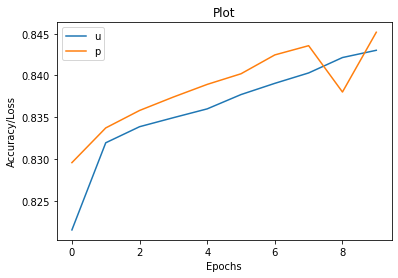

In [35]:
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")

plt.ylabel("Accuracy/Loss")
plt.xlabel("Epochs")
plt.title("Plot")
plt.legend("upper left")

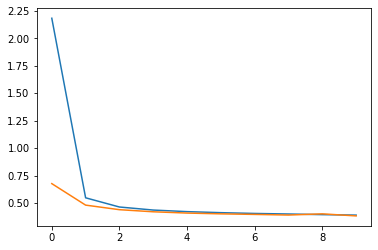

In [36]:
plt.plot(history.history['loss'], label= "Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")


In [37]:
model.save("/content/drive/MyDrive/best-model.h5")